In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("science")
from scipy import stats

## Continuous optimal transport

$$\begin{array}{c} \min \\
\beta = T_\# \alpha \end{array} \int_X c(x, T(x)) d\alpha(x)$$

where $T_\# \alpha$ is the push-forward of $\alpha$

## Continuous optimal transport between gaussians

Let $X \sim N(m_\alpha, \sigma_\alpha)$ and $Y \sim N(m_\beta, \sigma_\beta)$

The optimal transport map between $X$ and $Y$ is

$$T(x) = \frac{\sigma_\beta}{\sigma_\alpha} (x - m_\alpha) + m_\beta$$

$$T(x) = \nabla \phi (x)$$

with 

$$\phi(x) = \frac{\sigma_\beta}{2\sigma_\alpha} (x-m_\alpha)^2 + m_\beta x$$

## Sample from gaussians in $\mathbb{R}$

In [2]:
m_alpha = 1.
sigma_alpha = 2.
m_beta = 30.
sigma_beta = 3.
n = 1000

In [3]:
x = sigma_alpha * np.random.randn(n) + m_alpha
y = sigma_beta * np.random.randn(n) + m_beta
xs = x.copy()
ys = y.copy()
xs.sort()
ys.sort()

In [4]:
alpha = stats.norm(m_alpha, sigma_alpha)
beta = stats.norm(m_beta, sigma_beta)

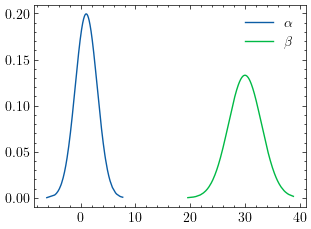

In [5]:
plt.plot(xs, alpha.pdf(xs), label = r"$\alpha$")
plt.plot(ys, beta.pdf(ys), label = r"$\beta$")
plt.legend()
plt.show()

### Flow

In [6]:
m = 8
dist = [(stats.norm(m, sigma), m, sigma)
        for m,sigma in zip(np.linspace(m_alpha, m_beta, m), np.linspace(sigma_alpha, sigma_beta, m))]

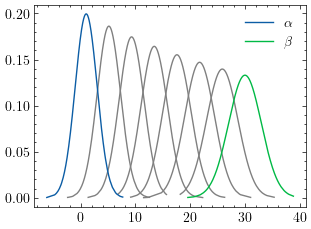

In [7]:
for d, m, sigma in dist[1:len(dist)-1]:
    x = sigma * np.random.randn(n) + m
    x.sort()
    pdfx = d.pdf(x)
    plt.plot(x, pdfx, color = "grey")
plt.plot(xs, alpha.pdf(xs), label = r"$\alpha$")
plt.plot(ys, beta.pdf(ys), label = r"$\beta$")
plt.legend()
plt.show()

## Optimal transport plan

In [8]:
def phi(x):
    return sigma_beta * (x - m_alpha)**2 / 2 * sigma_beta + m_beta * x

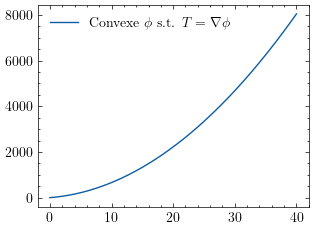

In [9]:
z = np.linspace(0, 40, 1000)
plt.plot(z, phi(z), label = r"Convexe $\phi$ s.t. $T = \nabla \phi$")
plt.legend()
plt.show()

In [10]:
def transport_plan(x):
    return sigma_beta * (x - m_alpha) / sigma_beta + m_beta 

In [11]:
z = transport_plan(xs)

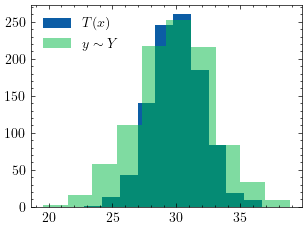

In [12]:
plt.hist(z, label = r"$T(x)$")
plt.hist(ys, alpha = .5, label = r"$y \sim Y$")
plt.legend()
plt.show()

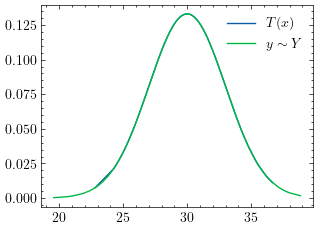

In [13]:
plt.plot(z, beta.pdf(z), label = r"$T(x)$")
plt.plot(ys, beta.pdf(ys), label = r"$y \sim Y$")
plt.legend()
plt.show()

## Optimal transport interpolation

**Repartition function $C_\alpha : \alpha \rightarrow [0, 1]$**

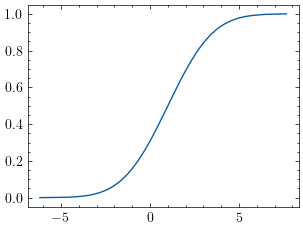

In [14]:
plt.plot(xs, alpha.cdf(xs))
plt.show()

**Quantile function $C_\beta^{-1} : [0, 1] \rightarrow \beta$**

In [15]:
u = np.array([np.random.uniform() for _ in range(n)])
q = [np.quantile(ys, _u) for _u in u]

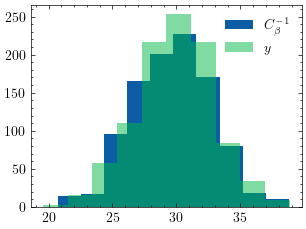

In [16]:
plt.hist(q, label = r"$C_\beta^{-1}$")
plt.hist(ys, alpha = .5, label = r"$y$")
plt.legend()
plt.show()

**Optimal transport plan $T = C_\beta^{-1} o C_\alpha$**

In [17]:
u = alpha.cdf(xs)
q = np.array([np.quantile(ys, _u) for _u in u])

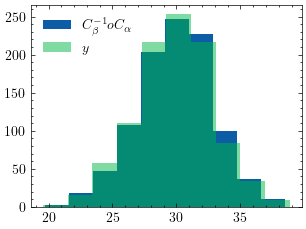

In [18]:
plt.hist(q, label = r"$C_\beta^{-1}oC_\alpha$")
plt.hist(ys, alpha = .5, label = r"$y$")
plt.legend()
plt.show()

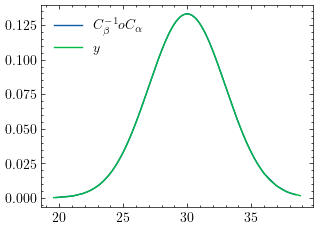

In [19]:
qs = q.copy()
qs.sort()
plt.plot(q, beta.pdf(qs), label = r"$C_\beta^{-1}oC_\alpha$")
plt.plot(ys, beta.pdf(ys), label = r"$y$")
plt.legend()
plt.show()

## References